## Predicting the Sale price of Bulldozers using ML
In this notebook we are going to analyze an example machine learning project to analyze the sale price of bulldozers 

**1. Problem Definition**

**2. Data**
>**Data is downloaded from Kaggle's Bulldozer Competition**

> The data for this competition is split into three parts:
> 1. **Train.csv** is the training set, which contains data through the end of 2011.
> 2. **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
> 3. **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

The key fields are in train.csv are:
> 1. **SalesID:** the uniue identifier of the sale
> 2. **MachineID:** the unique identifier of a machine.  A machine can be sold multiple times
> 3. **saleprice:** what the machine sold for at auction (only provided in train.csv)
> 4. **saledate:** the date of the sale
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

**3. Evaluation**
> The evaluation metrics for this competition is RMSLE (root mean squared log error) between the actual and predicted auction prices.

> **Note:** The goal for most regression evaluation metrics is to minimise the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

**4. Features**
> Take reference to Dictionary.xlsx

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
'''pandas tries to minimise space consumption on RAM by using LowMemory 
Error, disable filterwarnings to check the error. To correc the error,
we are writing the above as ignore Low_memory'''
data=pd.read_csv("Files/TrainAndValid.csv",low_memory=False)
data.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
data.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [5]:
# Finding the missing values in our data set
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

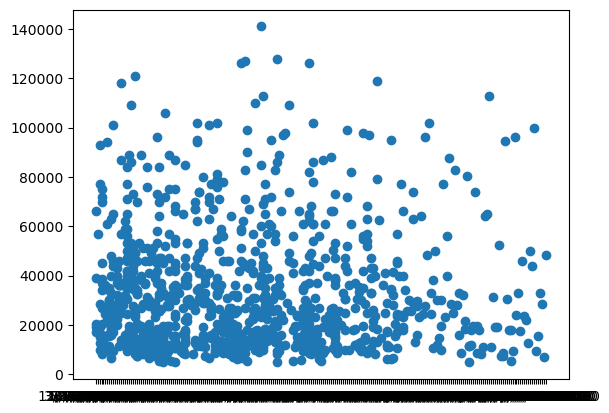

In [6]:
fig,ax = plt.subplots()
ax.scatter(data['saledate'][:1000],data['SalePrice'][:1000])
plt.show()

In [7]:
# the above x axis looks very congested as the date format is too large
data['saledate']

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

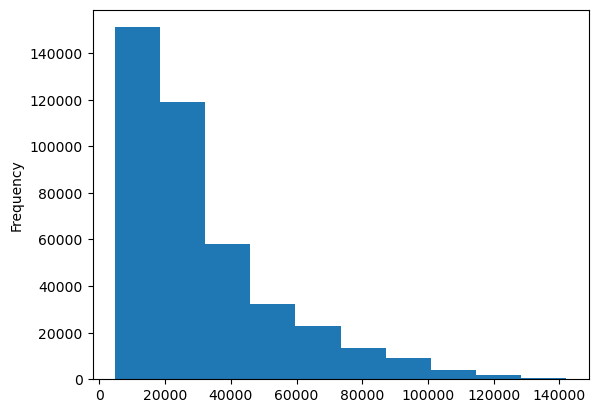

In [8]:
data.SalePrice.plot.hist();
# x axis is the saleprice and y axis is the sale amount

### Parsing Dates
when we work with time series data, we want to enrich the time data component as much as possible.
We can do that by telling pandas which of our column has dates in it using the `parse_dates` parameter

In [9]:
# Importing data but with parse dates
data=pd.read_csv("Files/TrainAndValid.csv",low_memory=False,
                parse_dates=['saledate'])
data.saledate[:1000]
# view the saledate format above to notice the change

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

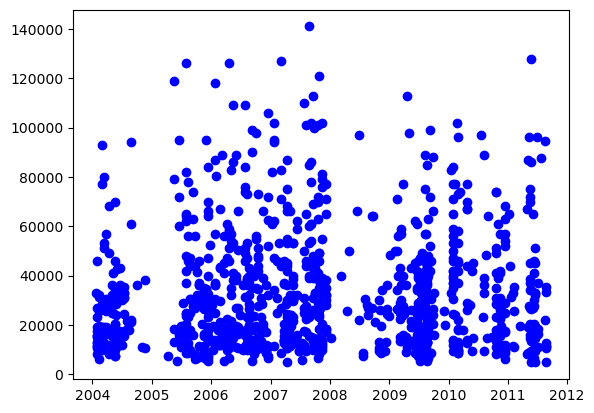

In [10]:
fig,ax=plt.subplots()
ax.scatter(data['saledate'][:1000],data['SalePrice'][:1000],c='blue')
plt.show()

In [11]:
data.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
data.saledate.head(15)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
Name: saledate, dtype: datetime64[ns]

In [13]:
# sort dataframe as per SaleDate
'''When working with time series data, its a good idea to sort it by date'''
data.sort_values(by=['saledate'],inplace=True,ascending=True)
data.saledate.head(15) #for first 15 dates in the dataset

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
Name: saledate, dtype: datetime64[ns]

We can see that the indexes have been replaced and arranged as per the oldest to the earliest dates

In [14]:
# Copying the above dataset to a random new one
data_tmp=data.copy()
data_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,2012-04-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Using `DateTime` Params

In [15]:
data_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [16]:
data_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [17]:
data_tmp['saleYear']=data_tmp.saledate.dt.year
data_tmp['saleMonth']=data_tmp.saledate.dt.month
data_tmp['saleDay']=data_tmp.saledate.dt.day
data_tmp['saleDayofWeek']=data_tmp.saledate.dt.dayofweek
data_tmp['saleDayofYear']=data_tmp.saledate.dt.dayofyear
data_tmp.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [18]:
data_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Modelling 
#### _Model driven_ `EDA`

In [19]:
# Building a machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
model.fit(data_tmp.drop("SalePrice",axis=1),data_tmp['SalePrice'])
# Error is due to the presence of unarranged missing data in out dataframe

ValueError: could not convert string to float: 'Low'

In [ ]:
print(data_tmp['UsageBand'].dtype)
print("------------------------------")
print(data_tmp.isna().sum())

## Converting string to categories
One way to turn all our data into numbers is by converting them into pandas categories

In [20]:
pd.api.types.is_string_dtype(data_tmp['UsageBand'])

True

In [21]:
# to check which columns have strings
for label, columns in data_tmp.items():
    if pd.api.types.is_string_dtype(columns):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
# to convert columns to catergories having strings
# as machine learning models cant process string type data
for label, columns in data_tmp.items():
    if pd.api.types.is_string_dtype(columns):
        data_tmp[label]=columns.astype("category").cat.as_ordered()

In [23]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

In [24]:
data_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [25]:
# percentage of missing data in the dataframe
data_tmp.isnull().sum()/len(data_tmp)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

### Exporting the preprocessed data

In [26]:
data_tmp.to_csv("TrainTemp.csv",index=False)

In [27]:
dataset=pd.read_csv("TrainTemp.csv",low_memory=False)
dataset.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17,1989-01-31,1989-01-31,1989-01-31,1989-01-31


In [28]:
dataset.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

### Fill missing values 


In [29]:
for label, content in dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        print (label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayofWeek
saleDayofYear


In [30]:
# cgeck wich column has null values
for label, content in dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [31]:
# fill numeric rows with the median
for label, content in dataset.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column which tells us if the data was missing
            dataset[label+" Is Missing"]=pd.isnull(content)
            # fill missing numeric values with median
            dataset[label]=content.fillna(content.median())

In [32]:
dataset['auctioneerID Is Missing'].value_counts()

False    392562
True      20136
Name: auctioneerID Is Missing, dtype: int64

In [33]:
rows_with_true_auctioneer_id=dataset[dataset['auctioneerID Is Missing'] == True]
rows_with_true_auctioneer_id

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear,auctioneerID Is Missing,MachineHoursCurrentMeter Is Missing
154248,2357213,37000.0,1702442,22172,136,2.0,2003,9044.0,High,2003-12-08,...,None or Unspecified,NaN,NaN,2003,12,8,0,342,True,False
222492,2331246,21500.0,1700283,8265,136,2.0,1000,0.0,NaN,2007-03-14,...,NaN,NaN,NaN,2007,3,14,2,73,True,False
222506,2410578,22000.0,1386646,198,136,2.0,1000,0.0,NaN,2007-03-14,...,None or Unspecified,NaN,NaN,2007,3,14,2,73,True,False
222512,2338305,48000.0,1705197,4701,136,2.0,1999,5900.0,Medium,2007-03-14,...,NaN,Standard,Conventional,2007,3,14,2,73,True,False
222533,2274219,36000.0,1779952,4139,136,2.0,1976,0.0,NaN,2007-03-14,...,None or Unspecified,NaN,NaN,2007,3,14,2,73,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329154,2349938,19500.0,1736651,4605,136,2.0,2004,0.0,NaN,2009-11-20,...,NaN,NaN,NaN,2009,11,20,4,324,True,False
329159,4512355,15000.0,2386404,3546,136,2.0,1994,0.0,NaN,2009-11-20,...,NaN,NaN,NaN,2009,11,20,4,324,True,True
332368,2409297,50000.0,1450608,16673,136,2.0,2004,5667.0,Medium,2009-12-17,...,NaN,Standard,Conventional,2009,12,17,3,351,True,False
332415,2414763,27000.0,1380548,9106,136,2.0,2003,3482.0,Medium,2009-12-17,...,NaN,Standard,Conventional,2009,12,17,3,351,True,False


In [34]:
dataset.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
saledate                                    0
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                         

In [36]:
# Check which column has null values
print("Missing values : ")
print("---------------------------------------")
for label, content in dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        num_missing = content.isnull().sum()
        if num_missing > 0:
            print(f"{label} ---- {num_missing}")

Missing values : 
---------------------------------------
UsageBand ---- 339028
fiSecondaryDesc ---- 140727
fiModelSeries ---- 354031
fiModelDescriptor ---- 337882
ProductSize ---- 216605
Drive_System ---- 305611
Enclosure ---- 334
Forks ---- 214983
Pad_Type ---- 331602
Ride_Control ---- 259970
Stick ---- 331602
Transmission ---- 224691
Turbocharged ---- 331602
Blade_Extension ---- 386715
Blade_Width ---- 386715
Enclosure_Type ---- 386715
Engine_Horsepower ---- 386715
Hydraulics ---- 82565
Pushblock ---- 386715
Ripper ---- 305753
Scarifier ---- 386704
Tip_Control ---- 386715
Tire_Size ---- 315060
Coupler ---- 192019
Coupler_System ---- 367724
Grouser_Tracks ---- 367823
Hydraulics_Flow ---- 367823
Track_Type ---- 310505
Undercarriage_Pad_Width ---- 309782
Stick_Length ---- 310437
Thumb ---- 310366
Pattern_Changer ---- 310437
Grouser_Type ---- 310505
Backhoe_Mounting ---- 331986
Blade_Type ---- 330823
Travel_Controls ---- 330821
Differential_Type ---- 341134
Steering_Controls ---- 341176

In [37]:
# Checking categoricals to numerics which has null values
for label, content in dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
         # add a binary column which tells us if the data was missing
            dataset[label+" Is Missing"]=pd.isnull(content)
            # fill missing numeric values with median
            dataset[label]=pd.Categorical(content).codes+1
# +1 to replace the -1 we have in our dataset

In [38]:
dataset.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width Is Missing,Stick_Length Is Missing,Thumb Is Missing,Pattern_Changer Is Missing,Grouser_Type Is Missing,Backhoe_Mounting Is Missing,Blade_Type Is Missing,Travel_Controls Is Missing,Differential_Type Is Missing,Steering_Controls Is Missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,1,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,2,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2,...,True,True,True,True,True,False,False,False,True,True


In [39]:
dataset.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting Is Missing     0
Blade_Type Is Missing           0
Travel_Controls Is Missing      0
Differential_Type Is Missing    0
Steering_Controls Is Missing    0
Length: 105, dtype: int64

### Fitting the machine learning model

In [40]:
%%time
#instantiate model
model=RandomForestRegressor(n_jobs=-1,random_state=42)
#model fitting
model.fit(dataset.drop("SalePrice",axis=1),dataset["SalePrice"])

CPU times: total: 53min 9s
Wall time: 6min 2s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [41]:
#scoring the model : closer to 1, better the model
model.score(dataset.drop("SalePrice",axis=1),dataset["SalePrice"])

0.9878495078116346

In [45]:
df_val=dataset[dataset.saleYear==2012]
df_train=dataset[dataset.saleYear!=2012]
len(df_val),len(df_train)

(11573, 401125)

_Filling missing data in the training set using information from the validation set can lead to overfitting and overly optimistic model performance, as it leaks information from the future into the past. To avoid this, we should encode all categorical variables on the entire dataset, split the data into training and validation sets, and fill missing numerical data in each set separately using only information from that set. This ensures that our model is not using information that would not be available in the real world and that our training and validation sets are representative of the data we are trying to model._

In [47]:
# X and Y train test split
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 104), (401125,), (11573, 104), (11573,))

In [59]:
'''Building an evaluation function as given in the instructions to use
RMSLE(Root Mean Squared Log Error) which is not a fucntion of scikit learn'''
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predicx and true 
    labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
# Create function to evaluate model on a few differrnt levels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
           "Valid MAE":mean_absolute_error(y_valid,val_preds),
           "Training RMSLE":rmsle(y_train,train_preds),
           "Valid RMSLE":rmsle(y_valid,val_preds),
           "Training R^2":r2_score(y_train,train_preds),
           "Valid R^2":r2_score(y_valid,val_preds)}
    return scores

1. The code imports two functions from scikit-learn: **mean_squared_log_error** and **mean_absolute_error**.

2. The code defines a function called `rmsle()` that takes two arguments: **y_test** and **y_preds**. It uses the **mean_squared_log_error** function to calculate the mean squared log error between the predicted and true labels, and then takes the square root of that value to get the RMSLE score. The function returns the RMSLE score.

3. The code defines a function called `show_scores()` that takes a single argument: model, a trained machine learning model. The function uses the model to make predictions on both the training and validation sets.

4. The function then calculates several evaluation scores using the predicted and true labels: **mean absolute error (MAE)** for both training and validation sets, `RMSLE for the training set`, and `R^2 scores for both training and validation sets`.

5. The evaluation scores are stored in a dictionary called scores, with keys indicating the type of score and values indicating the actual score.

6. Finally, the function returns the scores dictionary.

In [62]:
'''%%time
#instantiate model
model=RandomForestRegressor(n_jobs=-1,random_state=42)
#model fitting
model.fit(X_train,y_train)'''

model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)

_The advantage of using the uncommented line of code with `max_samples=10000` is that it can help to reduce overfitting and speed up training time, by restricting the number of samples used in each tree building iteration. However, this comes at the cost of potentially reducing the accuracy of the model, since it is working with a smaller subset of the data. The commented line of code, which does not include the max_samples parameter, would use all available data for each tree building iteration, potentially leading to longer training times and a higher risk of overfitting, but could also result in a more accurate model._

In [63]:
%%time
model.fit(X_train,y_train)

CPU times: total: 1min 19s
Wall time: 8.37 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [64]:
show_scores(model)

{'Training MAE': 5466.239305129321,
 'Valid MAE': 7260.289019268987,
 'Training RMSLE': 0.2551666876405142,
 'Valid RMSLE': 0.29887271623967787,
 'Training R^2': 0.8642843539479744,
 'Valid R^2': 0.8304445443415891}

## Hyperparameter tuning with RandomizedSearchCV

_In machine learning, hyperparameters are parameters that are set prior to training a model and determine how the model is trained. These parameters cannot be learned from the data itself, unlike the weights of the model. Instead, they must be chosen based on the characteristics of the data and the problem being solved._

Examples of hyperparameters include the learning rate, regularization strength, number of hidden layers in a neural network, and so on. Proper tuning of hyperparameters is critical to achieving good performance on a given task.

`Hyperparameter tuning` _is an essential step in the machine learning workflow to achieve better model performance. `RandomizedSearchCV` is a hyperparameter tuning technique provided by scikit-learn that helps you search over a range of hyperparameters using a randomized search approach instead of an exhaustive one. It randomly selects a combination of hyperparameters from a specified range and evaluates them using cross-validation, then returns the best combination of hyperparameters that results in the best performance. This helps to automate the hyperparameter tuning process and saves time compared to manual tuning_

In [66]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[10000]}
# Instantiate randomizedSearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                           param_distributions=rf_grid,
                           n_iter=5,cv=5,verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 1min 22s
Wall time: 1min 44s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [67]:
show_scores(rs_model)

{'Training MAE': 6763.568695170989,
 'Valid MAE': 8136.753390419396,
 'Training RMSLE': 0.30392077562720426,
 'Valid RMSLE': 0.3266109015185046,
 'Training R^2': 0.8035484401043218,
 'Valid R^2': 0.7901518289250598}

### Training a model with best hyper params

In [68]:
%%time
ideal_model=RandomForestRegressor(n_jobs=-1,
                                  random_state=42,
                                  max_samples=None,
                                 n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5)
ideal_model.fit(X_train,y_train)

CPU times: total: 11min 14s
Wall time: 1min 31s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [71]:
scores_model = list(show_scores(model).items())
scores_rs_model = list(show_scores(rs_model).items())
scores_ideal_model = list(show_scores(ideal_model).items())

print(scores_model)
print('-------------------------------')
print(scores_rs_model)
print('-------------------------------')
print(scores_ideal_model)

[('Training MAE', 5466.239305129321), ('Valid MAE', 7260.289019268987), ('Training RMSLE', 0.2551666876405142), ('Valid RMSLE', 0.29887271623967787), ('Training R^2', 0.8642843539479744), ('Valid R^2', 0.8304445443415891)]
-------------------------------
[('Training MAE', 6763.568695170989), ('Valid MAE', 8136.753390419396), ('Training RMSLE', 0.30392077562720426), ('Valid RMSLE', 0.3266109015185046), ('Training R^2', 0.8035484401043218), ('Valid R^2', 0.7901518289250598)]
-------------------------------
[('Training MAE', 2854.991172540116), ('Valid MAE', 5985.952142834034), ('Training RMSLE', 0.14113261647785363), ('Valid RMSLE', 0.2482429891091424), ('Training R^2', 0.9613507848116932), ('Valid R^2', 0.8822419828974755)]


In [72]:
# create a dictionary of scores for each model
scores_dict = {
    'Random Forest': show_scores(model),
    'RandomizedSearchCV': show_scores(rs_model),
    'Ideal Model': show_scores(ideal_model)}
# create a DataFrame from the scores dictionary and transpose it
scores_df = pd.DataFrame(scores_dict).T
# display the scores DataFrame
print(scores_df)

                    Training MAE    Valid MAE  Training RMSLE  Valid RMSLE  \
Random Forest        5466.239305  7260.289019        0.255167     0.298873   
RandomizedSearchCV   6763.568695  8136.753390        0.303921     0.326611   
Ideal Model          2854.991173  5985.952143        0.141133     0.248243   

                    Training R^2  Valid R^2  
Random Forest           0.864284   0.830445  
RandomizedSearchCV      0.803548   0.790152  
Ideal Model             0.961351   0.882242  


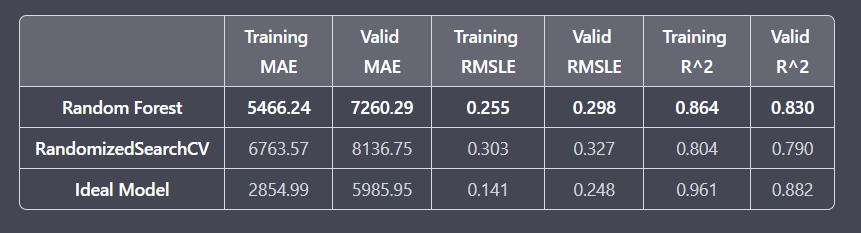

In [74]:
from IPython.display import Image
Image(filename='C:/Users/ANISH/Desktop/MCKVIE/6th Sem/machine learning/Bulldozer Price Prediction Model using Regression/abc.png')

## Make predictions on Test Data

In [163]:
# importing the test data
data_Test=pd.read_csv("Files\Test.csv",low_memory=False,parse_dates=["saledate"])
data_Test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [164]:
set(X_train.columns) - set(data_Test.columns)

{'Backhoe_Mounting Is Missing',
 'Blade_Extension Is Missing',
 'Blade_Type Is Missing',
 'Blade_Width Is Missing',
 'Coupler Is Missing',
 'Coupler_System Is Missing',
 'Differential_Type Is Missing',
 'Drive_System Is Missing',
 'Enclosure Is Missing',
 'Enclosure_Type Is Missing',
 'Engine_Horsepower Is Missing',
 'Forks Is Missing',
 'Grouser_Tracks Is Missing',
 'Grouser_Type Is Missing',
 'Hydraulics Is Missing',
 'Hydraulics_Flow Is Missing',
 'MachineHoursCurrentMeter Is Missing',
 'Pad_Type Is Missing',
 'Pattern_Changer Is Missing',
 'ProductGroup Is Missing',
 'ProductGroupDesc Is Missing',
 'ProductSize Is Missing',
 'Pushblock Is Missing',
 'Ride_Control Is Missing',
 'Ripper Is Missing',
 'Scarifier Is Missing',
 'Steering_Controls Is Missing',
 'Stick Is Missing',
 'Stick_Length Is Missing',
 'Thumb Is Missing',
 'Tip_Control Is Missing',
 'Tire_Size Is Missing',
 'Track_Type Is Missing',
 'Transmission Is Missing',
 'Travel_Controls Is Missing',
 'Turbocharged Is Missin

In [165]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+" Is Missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+" Is Missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [166]:
data_Test=preprocess_data(data_Test)
data_Test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width Is Missing,Stick_Length Is Missing,Thumb Is Missing,Pattern_Changer Is Missing,Grouser_Type Is Missing,Backhoe_Mounting Is Missing,Blade_Type Is Missing,Travel_Controls Is Missing,Differential_Type Is Missing,Steering_Controls Is Missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [167]:
test_preds = ideal_model.predict(data_Test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saleDayOfWeek
- saleDayOfYear
Feature names seen at fit time, yet now missing:
- auctioneerID Is Missing
- saleDayofWeek
- saleDayofYear
- saledate
- saledate Is Missing


In [168]:
# We can find how the columns differ using sets
set(X_train.columns) - set(data_Test.columns)

{'auctioneerID Is Missing',
 'saleDayofWeek',
 'saleDayofYear',
 'saledate',
 'saledate Is Missing'}